In [2]:
import ray
import os
import pandas as pd

In [3]:
os.environ["AWS_PROFILE"] = "facu-fullaccess"

In [4]:
ray.init(address="local")

2024-07-16 21:32:25,050	INFO worker.py:1743 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8265 


Python version:,3.11.9
Ray version:,2.10.0
Dashboard:,http://127.0.0.1:8265


In [5]:
ds = ray.data.read_json("s3://ray-demo-data/batch_classification/7_000004_000000.json")

In [8]:
import numpy as np
from PIL import Image
import io
import base64


def transform_record(record):
    # Decode the base64 string to bytes
    return {
        "predicted_label": record['predicted_label'],
        "image": record['original_image']
    }

In [9]:
ds_transformed = ds.map(transform_record).take_all()

2024-07-16 21:33:27,038	INFO streaming_executor.py:115 -- Starting execution of Dataset. Full log is in /tmp/ray/session_2024-07-16_21-32-23_122959_45570/logs/ray-data.log
2024-07-16 21:33:27,039	INFO streaming_executor.py:116 -- Execution plan of Dataset: InputDataBuffer[Input] -> TaskPoolMapOperator[ReadJSON] -> TaskPoolMapOperator[Map(transform_record)]



- ReadJSON->SplitBlocks(84) 1:   0%|          | 0/1 [00:00<?, ?it/s]

- Map(transform_record) 2:   0%|          | 0/1 [00:00<?, ?it/s]

Running 0:   0%|          | 0/1 [00:00<?, ?it/s]

In [12]:
ds_transformed[0]["image"]

numpy.ndarray

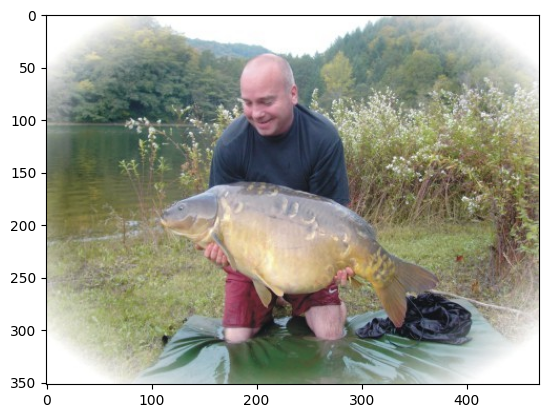

In [13]:
import matplotlib.pyplot as plt

plt.imshow(ds_transformed[0]["image"])